### Load data and perform k-means, kNN,

In [86]:
# start by loading needed packages
using DataFrames
using RDatasets
using Clustering
using Plots
using Requests
using NearestNeighbors

In [2]:
url = "https://raw.githubusercontent.com/davidhallac/NetworkLasso/master/Data/Sacramentorealestatetransactions.csv"
#normalized data here:
url_normalized = "https://raw.githubusercontent.com/davidhallac/NetworkLasso/master/Data/Sacramentorealestatetransactions_Normalized.csv"

"https://raw.githubusercontent.com/davidhallac/NetworkLasso/master/Data/Sacramentorealestatetransactions_Normalized.csv"

In [3]:
houses = readtable(Requests.get_streaming(url))

,street,city,zip,state,beds,baths,sq__ft,_type,sale_date,price,latitude,longitude
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.51947,-121.435768
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
8,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
10,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979



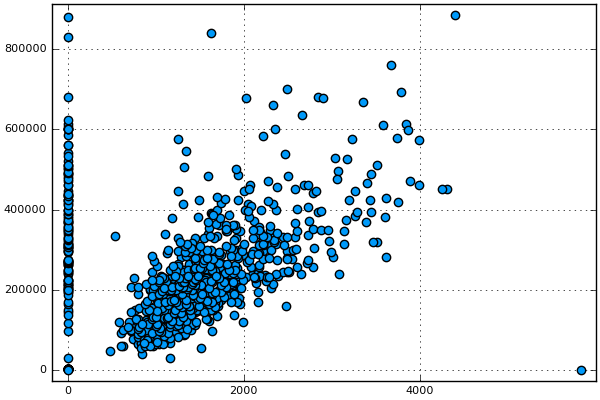

In [63]:
x = houses[:sq__ft];
y = houses[:price];
pyplot(legend=false) #set backend
scatter(x,y)


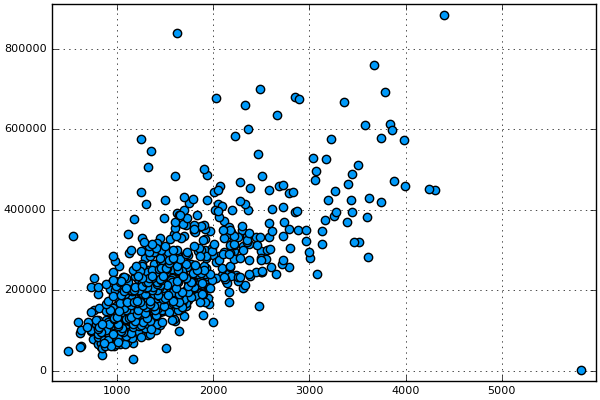

In [64]:
# many have zero values, let's drop these
filter_houses = houses[houses[:sq__ft].>0,:]
x = filter_houses[:sq__ft];
y = filter_houses[:price];
scatter(x,y)

In [65]:
# understanding the data better:
by(filter_houses,:_type,size)

,_type,x1
1,Condo,"(42,12)"
2,Multi-Family,"(13,12)"
3,Residential,"(759,12)"


In [66]:
by(filter_houses,:_type,filter_houses->mean(filter_houses[:price]))

,_type,x1
1,Condo,134212.80952380953
2,Multi-Family,224534.6923076923
3,Residential,234802.48221343872


k = length(unique(filter_houses[:zip])) = 66
P = Plot{Plots.PyPlotBackend() n=67}



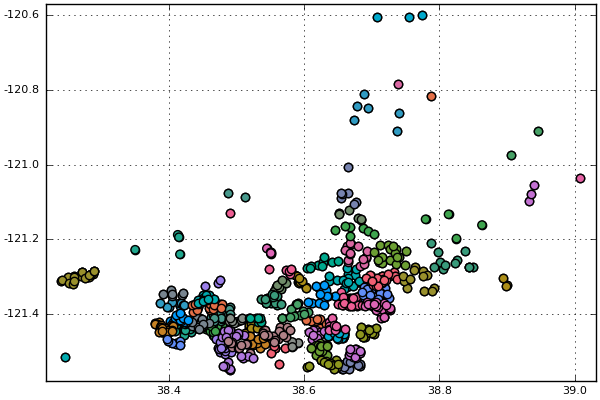

In [75]:
X = filter_houses[[:latitude,:longitude]]
X = Array(X)
# about to pass this to kmeans, rows should be features
X = X'
X = convert(Array{Float64,2},X)
@show k = length(unique(filter_houses[:zip]))
C = kmeans(X,k) # try changing k

df = DataFrame(cluster = C.assignments,city = filter_houses[:city],latitude = filter_houses[:latitude],longitude = filter_houses[:longitude]);
x = df[:latitude];
y = df[:longitude];
P = scatter(x,y)

els = unique(df[:cluster])

for i = 1:length(els)
    subs = filter_houses[df[:cluster].==els[i],:]
    a = subs[:latitude]
    b = subs[:longitude]
    scatter!(a,b)
end

@show P

P = Plot{Plots.PyPlotBackend() n=67}



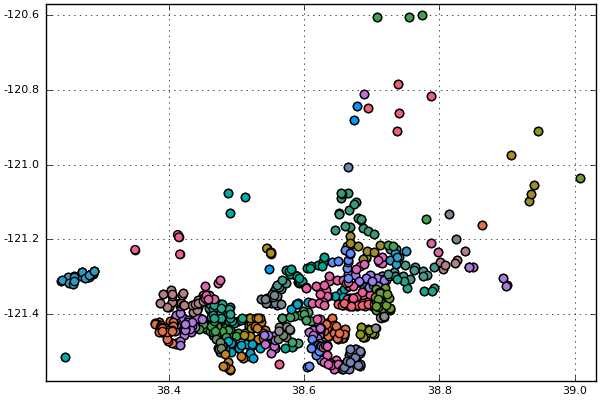

In [87]:
x = filter_houses[:latitude];
y = filter_houses[:longitude];
P = scatter(x,y)

els = unique(filter_houses[:zip])

for i = 1:length(els)
    subs = filter_houses[filter_houses[:zip].==els[i],:]
    a = subs[:latitude]
    b = subs[:longitude]
    scatter!(a,b)
end

@show P

In [96]:
k = 5
point = X[:,700]
kdtree = KDTree(X)
idxs, dists = knn(kdtree, point, k, true)
x = filter_houses[:latitude];
y = filter_houses[:longitude];
scatter(x,y)
x = filter_houses[idxs,:latitude];
y = filter_houses[idxs,:longitude];
scatter!(x,y)
cities = filter_houses[idxs,:city]

5-element DataArrays.DataArray{UTF8String,1}:
 "FOLSOM"     
 "FOLSOM"     
 "FOLSOM"     
 "ORANGEVALE" 
 "GRANITE BAY"


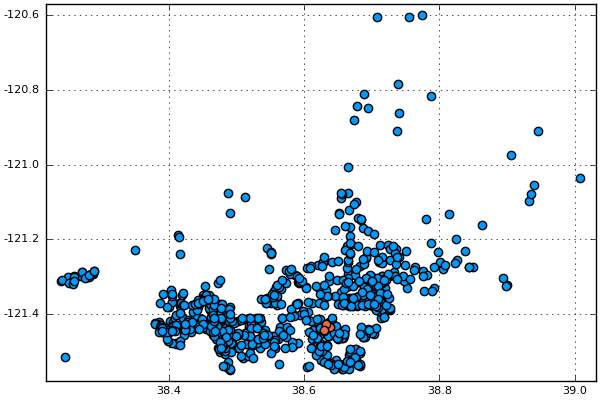

In [90]:
size(X)


(2,814)